CNN Model to detect different Human Emotions

Different Emotions detected in this Model: 'anger','fear','happy','neutral','sad','surprised'

Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from keras.optimizers import Adam

In [2]:
os.listdir(r'D:\DL Projects\Projects\Emotion Detection\test')

['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [3]:
os.listdir(r'D:\DL Projects\Projects\Emotion Detection\train')

['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [4]:
datadir=r'D:\DL Projects\Projects\Emotion Detection\train'    # training set path

Assigning the class labels and creating the training sets

In [5]:
X_train=[]
y_train=[]
categories=['angry','fearful','happy','neutral','sad','surprised']
for i in categories:
  path=os.path.join(datadir,i)    # gets the path of each folder
  #print(path)                    # D:\DL Projects\Projects\Emotion Detection\train\angry
  images=os.listdir(path)         # gets the images in each folders
  #print(images)
  print(i,':',len(images))        # check number of images in each folder
  for img in images:
    img_path=os.path.join(path,img)   # gets path of each image
    #print(img_path)                  #D:\DL Projects\Projects\Emotion Detection\train\angry\im1.png
    img_array=imread(img_path)        # gets the array of RGB values
    img_resized=resize(img_array,(64,64,1))  # channel 1 means greyscale image
    X_train.append(img_resized)
    y_train.append(categories.index(i))  # assigning class labels
  print('loaded category',i)


angry : 3995
loaded category angry
fearful : 4097
loaded category fearful
happy : 4988
loaded category happy
neutral : 4965
loaded category neutral
sad : 4830
loaded category sad
surprised : 3171
loaded category surprised


In [6]:
len(X_train)

26046

In [7]:
datadir_test=r'D:\DL Projects\Projects\Emotion Detection\test'

Creating test sets

In [8]:
X_test=[]
y_test=[]
categories=['angry','fearful','happy','neutral','sad','surprised']  # same order as training set
for i in categories:
  path=os.path.join(datadir_test,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  print(i,':',len(images))
  for img in images:
   img_path=os.path.join(path,img)
   #print(img_path)
   img_array=imread(img_path)
   img_resized=resize(img_array,(64,64,1))
   X_test.append(img_resized)
   y_test.append(categories.index(i))
  print('loaded category',i)

angry : 958
loaded category angry
fearful : 1024
loaded category fearful
happy : 1450
loaded category happy
neutral : 1233
loaded category neutral
sad : 1247
loaded category sad
surprised : 831
loaded category surprised


In [9]:
len(X_test)

6743

In [10]:
# Converting to numpy arrays
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [11]:
X_train.shape

(26046, 64, 64, 1)

In [12]:
y_train.shape

(26046,)

Creating the CNN model

In [13]:
model=Sequential()

model.add(Conv2D(32,3,input_shape=(64,64,1),activation='relu')) # 32 filters with shape 3x3  # convolution layer # input_shape required in first conv layer
model.add(MaxPool2D(2,2)) # pooling layer, 2 x 2 with stride 2

model.add(Conv2D(64,3,activation='relu')) 
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128,3, activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(128,activation='relu')) # fully connected layer #any no: of neurons
model.add(Dense(6,activation='softmax')) # output layer # 6 class labels-6 neurons

In [14]:
model.compile(optimizer=Adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,batch_size=500,epochs=50)

Epoch 1/50
53/53 [==============================] - 111s 2s/step - loss: 1.7838 - accuracy: 0.1957
Epoch 2/50
53/53 [==============================] - 87s 2s/step - loss: 1.7726 - accuracy: 0.2273
Epoch 3/50
53/53 [==============================] - 88s 2s/step - loss: 1.7403 - accuracy: 0.2506
Epoch 4/50
53/53 [==============================] - 101s 2s/step - loss: 1.6986 - accuracy: 0.2954
Epoch 5/50
53/53 [==============================] - 130s 2s/step - loss: 1.6468 - accuracy: 0.3310
Epoch 6/50
53/53 [==============================] - 142s 3s/step - loss: 1.5964 - accuracy: 0.3586
Epoch 7/50
53/53 [==============================] - 101s 2s/step - loss: 1.5627 - accuracy: 0.3783
Epoch 8/50
53/53 [==============================] - 105s 2s/step - loss: 1.5401 - accuracy: 0.3859
Epoch 9/50
53/53 [==============================] - 110s 2s/step - loss: 1.5180 - accuracy: 0.3962
Epoch 10/50
53/53 [==============================] - 87s 2s/step - loss: 1.4977 - accuracy: 0.4052
Epoch 11/50


In [17]:
loss,accu=model.evaluate(X_test,y_test)         # returns loss and accuracy of test set
print('Loss:',loss)
print('Accuracy:',accu)

211/211 [==============================] - 7s 34ms/step - loss: 1.2703 - accuracy: 0.5176
Loss: 1.2703001499176025
Accuracy: 0.5175737738609314


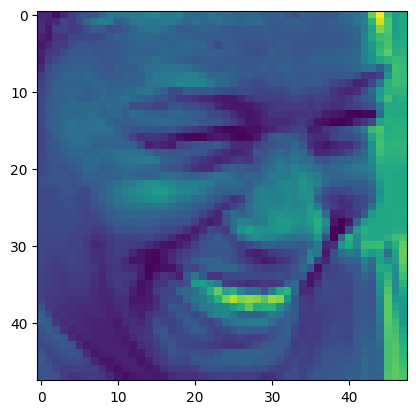

In [18]:
img=imread(r'D:\DL Projects\Projects\Emotion Detection\test\happy\im5.png')
plt.imshow(img)

In [19]:
img=resize(img,(64,64,1))
img_array=np.array(img)
img_array=img_array.reshape(1,64,64,1)  # same dimension as X_train

In [20]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 155ms/step
[[0.04516981 0.015049   0.8778675  0.02318769 0.03698705 0.00173885]]


In [21]:
ind=pred.argmax()  # max percentage in class labels
print(ind)
print(categories[ind])

2
happy


In [22]:
model.save('emotion_model.h5')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
